EM ALGORITHM

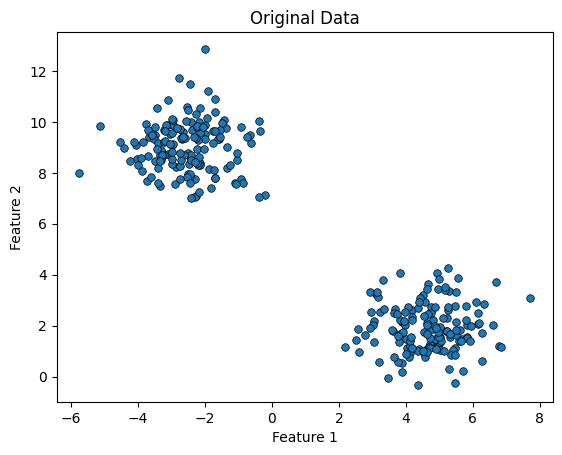

Final means:
[[-2.55143224  9.02835242]
 [ 4.66375945  1.92025297]]

Final covariances:
[[[ 0.93427526 -0.01424697]
  [-0.01424697  0.98747069]]

 [[ 0.97962592  0.039166  ]
  [ 0.039166    0.87508467]]]

Final weights:
[0.5 0.5]


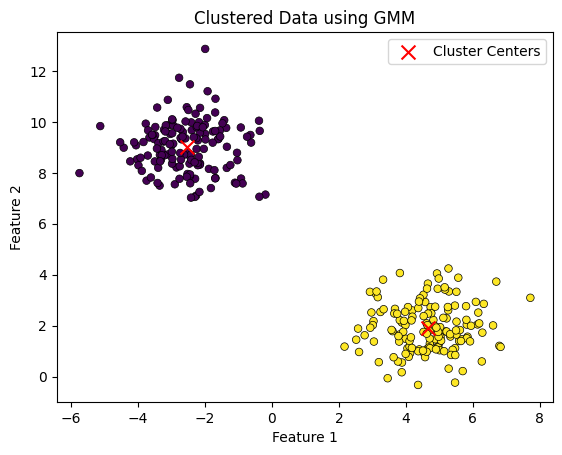

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

def generate_data(num_samples):
    # Generate data from a mixture of two blobs
    data, _ = make_blobs(n_samples=num_samples, centers=2, cluster_std=1.0, random_state=42)
    return data

def plot_data(data, title):
    plt.scatter(data[:, 0], data[:, 1], s=30, marker='o', edgecolors='k', linewidths=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def main():
    num_samples = 300
    data = generate_data(num_samples)
    plot_data(data, "Original Data")

    # Using scikit-learn Gaussian Mixture Model
    num_clusters = 2
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(data)

    # Get the final parameters from the GMM
    means = gmm.means_
    covariances = gmm.covariances_
    weights = gmm.weights_

    print("Final means:")
    print(means)
    print("\nFinal covariances:")
    print(covariances)
    print("\nFinal weights:")
    print(weights)

    # Plot the data with the learned clusters
    plt.scatter(data[:, 0], data[:, 1], s=30, marker='o', edgecolors='k', linewidths=0.5, c=gmm.predict(data))
    plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    plt.title("Clustered Data using GMM")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()



NAIVE BAYES

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


K MEANS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


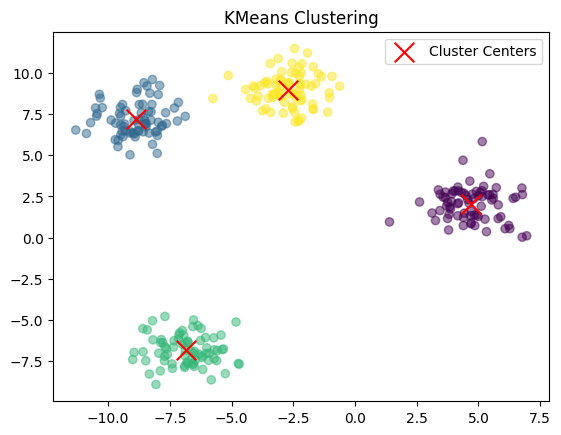

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data for clustering
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create a KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


APRIORI

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data
transactions = [['bread', 'milk', 'beer'],
                ['bread', 'diapers', 'eggs'],
                ['milk', 'diapers', 'beer', 'cola'],
                ['bread', 'milk', 'diapers', 'beer'],
                ['bread', 'milk', 'eggs']]

# Transform the transaction data to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Print the support for each frequent itemset
print("Frequent Itemsets:")
print(frequent_itemsets[['itemsets', 'support']])

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the confidence for each association rule
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])



Frequent Itemsets:
                 itemsets  support
0                  (beer)      0.6
1                 (bread)      0.8
2               (diapers)      0.6
3                  (eggs)      0.4
4                  (milk)      0.8
5           (bread, beer)      0.4
6         (beer, diapers)      0.4
7            (beer, milk)      0.6
8        (bread, diapers)      0.4
9           (bread, eggs)      0.4
10          (bread, milk)      0.6
11        (diapers, milk)      0.4
12    (bread, beer, milk)      0.4
13  (beer, diapers, milk)      0.4

Association Rules:
       antecedents consequents  support  confidence
0           (beer)      (milk)      0.6        1.00
1           (milk)      (beer)      0.6        0.75
2           (eggs)     (bread)      0.4        1.00
3          (bread)      (milk)      0.6        0.75
4           (milk)     (bread)      0.6        0.75
5    (bread, beer)      (milk)      0.4        1.00
6  (beer, diapers)      (milk)      0.4        1.00
7  (diapers, milk)  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


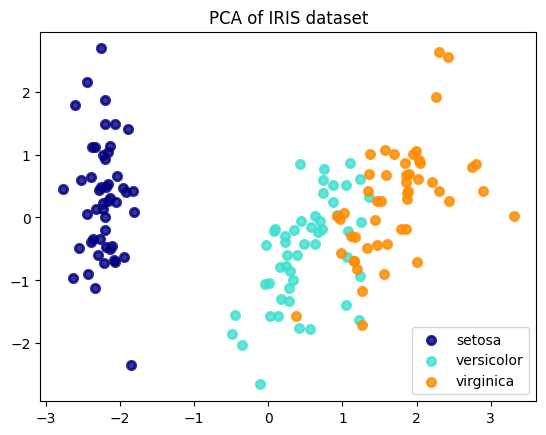

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Plot the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()